# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ../python
from unityagents import UnityEnvironment
import numpy as np
import sys
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

sys.path.append("./src")

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
%load_ext autoreload
%autoreload 2
from agent import MADDPG_Agent

In [3]:
resource_path = Path("resources")

weight_path = resource_path.joinpath("weights")
plot_path = resource_path.joinpath("plots")
metric_path = resource_path.joinpath("metrics")

weight_path.mkdir(parents=True, exist_ok=True)
plot_path.mkdir(parents=True, exist_ok=True)
metric_path.mkdir(parents=True, exist_ok=True)


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [4]:
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print(f"state array format: {states.shape}")

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
state array format: (2, 24)


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [7]:
"""
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    i = 0
    while True:
        i+=1
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
"""

"\nfor i in range(1, 6):                                      # play game for 5 episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations                  # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    i = 0\n    while True:\n        i+=1\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_in

In [8]:
agent = MADDPG_Agent(state_size=state_size, action_size=action_size, seed=0, use_noise=True, num_agents=num_agents, grad_clip=False)

env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0

Training started
Episode 50	 Mean score: -0.00	Average Score: 0.00
Episode 100	 Mean score: -0.00	Average Score: 0.00
Episode 150	 Mean score: -0.00	Average Score: 0.00
Episode 200	 Mean score: -0.00	Average Score: 0.00
Episode 250	 Mean score: -0.00	Average Score: 0.00
Episode 300	 Mean score: -0.00	Average Score: 0.00
Episode 350	 Mean score: -0.00	Average Score: 0.00
Episode 400	 Mean score: -0.00	Average Score: 0.00
Episode 450	 Mean score: -0.00	Average Score: 0.00
Episode 500	 Mean score: -0.00	Average Score: 0.01
Episode 550	 Mean score: -0.00	Average Score: 0.01
Episode 600	 Mean score: -0.00	Average Score: 0.01
Episode 650	 Mean score: -0.00	Average Score: 0.01
Episode 700	 Mean score: -0.00	Average Score: 0.01
Episode 750	 Mean score: -0.00	Average Score: 0.01
Episode 800	 Mean score: 0.05	Average Score: 0.02
Episode 850	 Mean score: -0.00	Average Score: 0.02
Episode 900	 Mean score: -0.00	Average Score: 0.01
Episode 950	 Mean score: -0.00	Average Score: 0.02
Episode 1000	 Me

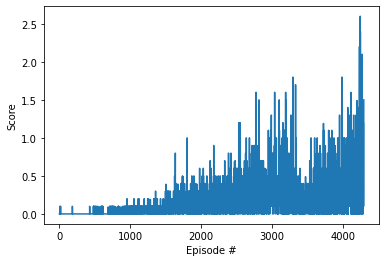

In [9]:
from collections import deque

score_goal = 0.5
score_window = 100

def ma_ddpg(n_episodes=5000, max_t=1000, score_window=100, print_freq=50): #, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Training of a multi-agent deep deterministic policy gradient RL agent.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        score_window (int) : 

    """
    scores = []               # initialize the score (for each agent)
    scores_window = deque(maxlen=score_window)  # last 100 scores
    # eps = eps_start                             # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        score = np.zeros(num_agents)   
        agent.reset_noise()
        
        for t in range(max_t):

            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            #for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            agent.step(states, actions, rewards, next_states, dones, t)

            states = next_states
            score += rewards
            if np.any(dones):
                break 
        scores_window.append(np.max(score))       # save most recent score
        scores.append(np.max(score))              # save most recent score

        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % print_freq == 0:
            print('\rEpisode {}\t Mean score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, np.mean(score), np.mean(scores_window)))
        if np.mean(scores_window)>=score_goal:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            np.save(str(metric_path.joinpath("maddpg_goal.npy")), np.array(i_episode))
            agent.save(weight_path)
            break
    return scores

print("Training started")
scores = ma_ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)

#
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [10]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

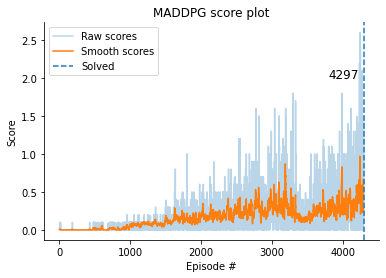

In [18]:
env_solved = np.load(metric_path.joinpath("maddpg_goal.npy"))

mean_scores = moving_average(scores, 10)
fig, ax = plt.subplots()
ax.plot(np.arange(len(scores)), scores, alpha=0.3, label="Raw scores")
ax.plot(np.arange(len(mean_scores)), mean_scores, label="Smooth scores")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.axvline(env_solved, 0.0, 1, color="#1f77b4", linestyle='--', label="Solved")
plt.text(env_solved-500, 2 ,str(env_solved), fontsize=12)

plt.legend(loc="upper left")
plt.title("MADDPG score plot")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig(str(plot_path.joinpath("maddpg_score_plot.png")))

In [12]:
env.close()